## <span style="color: rgb(180,0,0);">To analyze the Heart Disease dataset and explore various machine learning algorithms for building predictive models that accurately identify the presence of heart disease</span>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split

In [111]:
df= pd.read_csv(r'C:\Users\Owner\Documents\Data Science and Analytic with AI\Project\Class Project -ML\HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
def check_df(data):
    print("---------------------------------------------------------------------------------\nShape of the Dataset\n",data.shape)
    print("---------------------------------------------------------------------------------\nOverviewof Data\n",df.head())
    print("---------------------------------------------------------------------------------\nDescriptive Statistics\n" ,data.describe().T)
    print("---------------------------------------------------------------------------------\n",data.info())
    print("---------------------------------------------------------------------------------\nchecking for Duplicate data\n",data.duplicated().any())
    print("---------------------------------------------------------------------------------\nChecking for NAN\n",data.isna().sum())


check_df(df)

---------------------------------------------------------------------------------
Shape of the Dataset
 (303, 14)
---------------------------------------------------------------------------------
Overviewof Data
    age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
0   63       1           3       145         233                    1   
1   37       1           2       130         250                    0   
2   41       0           1       130         204                    0   
3   56       1           1       120         236                    0   
4   57       0           0       120         354                    0   

   rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  target  
0         0      150            0       2.3      0   0            1       1  
1         1      187            0       3.5      0   0            2       1  
2         0      172            0       1.4      2   0            2       1  
3         1      178            0   

#### *More informations about dataset*

- Dataset has 303 rows and 14 columns
- All of values are numeric. 
- There are no NULL and NAN values in the dataset
- Data in Target column tells us whether someone get heart disease or not and these are represented 0 and 1.
thalach: The person's maximum heart rate achieved
  

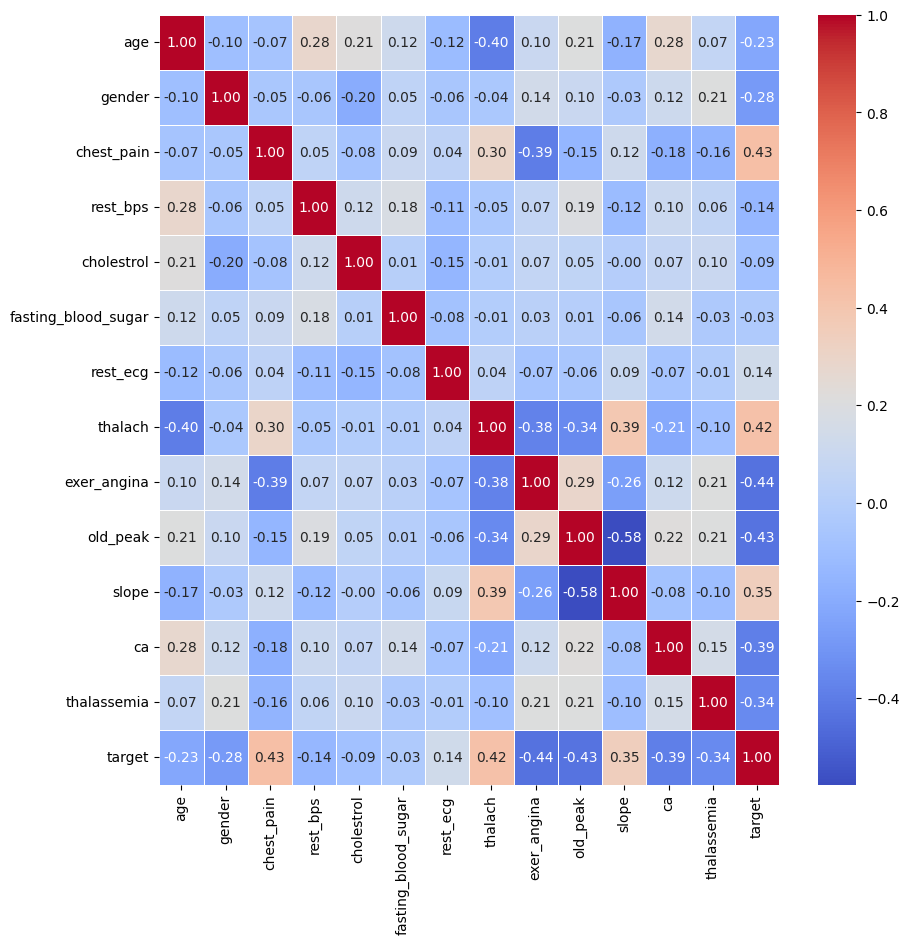

In [115]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True, cmap= 'coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [116]:
df.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [117]:
cat_col = [col for col in df.columns if df[col].nunique() < 6]
num_col = [col for col in df.columns if df[col].nunique() > 6]
print("Categorical Column are:",cat_col,"\nno. of cat_col=", len(cat_col))
print("Numberical Columns are:",num_col, "\nno. of num_col=",len(num_col))

Categorical Column are: ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia', 'target'] 
no. of cat_col= 9
Numberical Columns are: ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak'] 
no. of num_col= 5


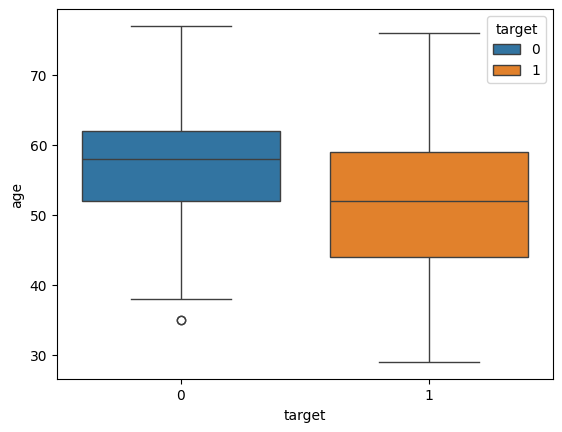

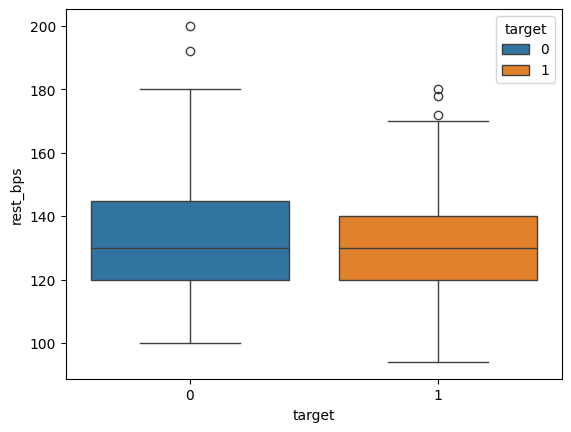

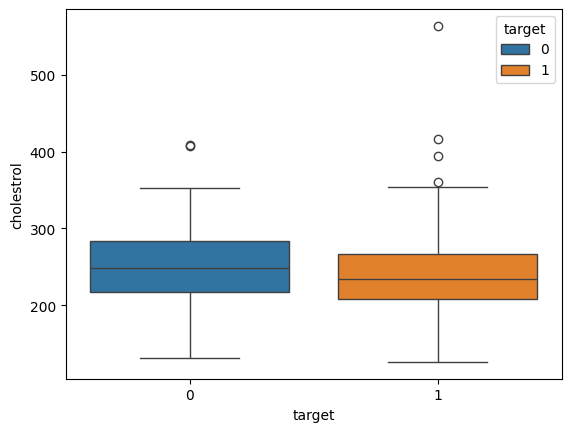

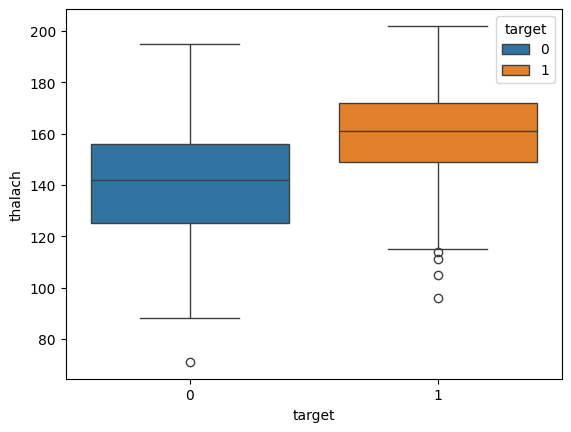

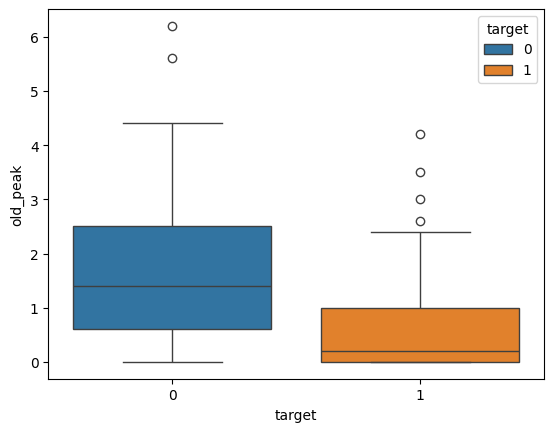

In [118]:
#checking for the outliers
for col in num_col:
    sns.boxplot(data=df,x='target',y=col,hue='target')
    plt.show()

age
-0.2014596901125439


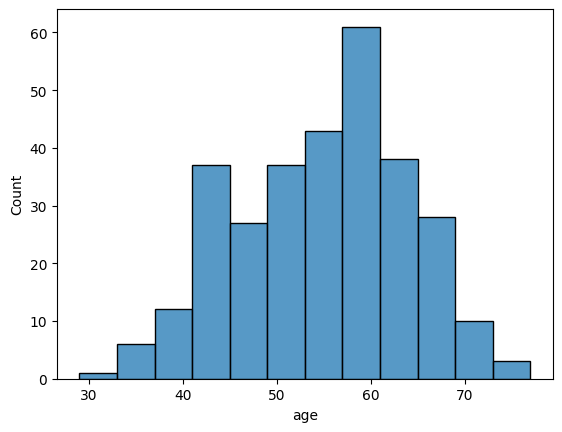

rest_bps
0.7102300604861443


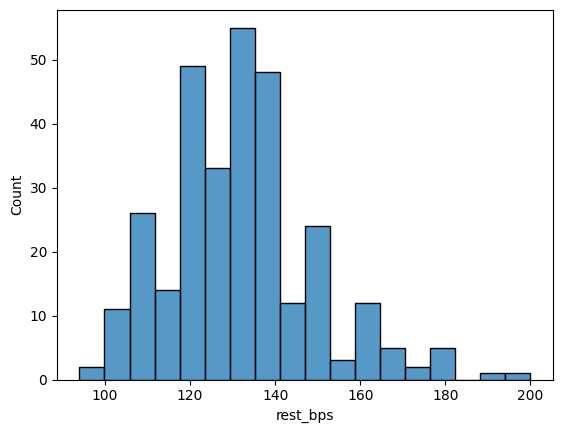

cholestrol
1.1377326187082244


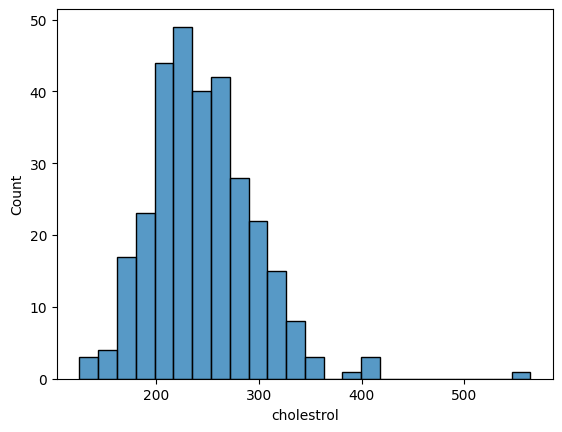

thalach
-0.5347455419075503


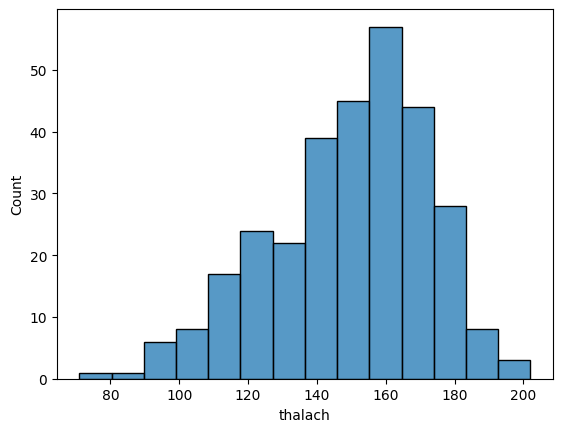

old_peak
1.2634255245891595


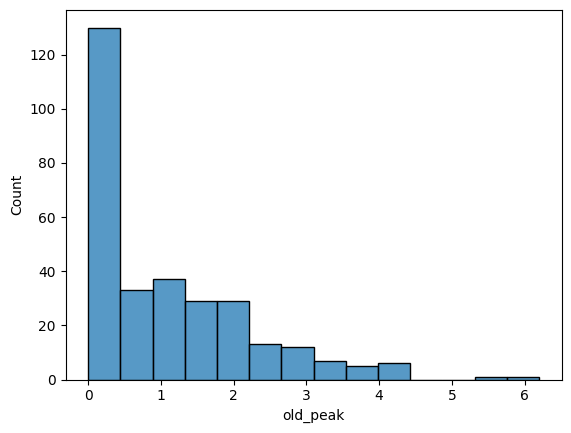

In [119]:
# To check the distribution of categorical data
from scipy.stats import skew
for col in num_col:
    print(col)
    print(skew(df[col]))
    sns.histplot(data=df[df["target"] == 1], x=df[col])
    plt.show(block=True)

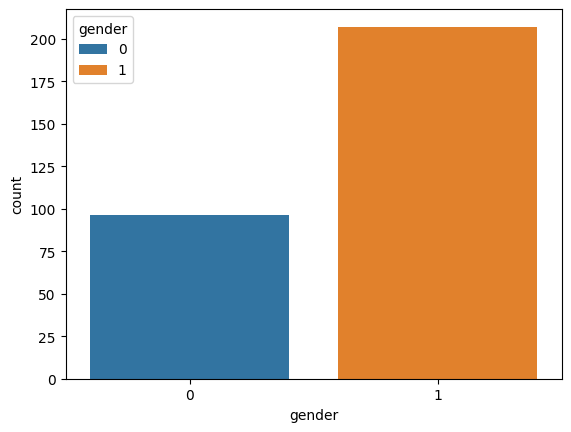

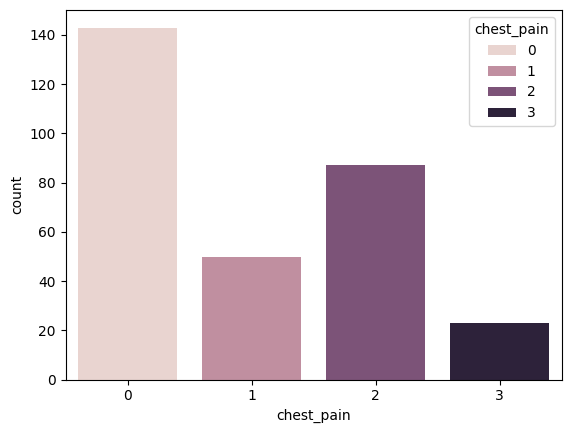

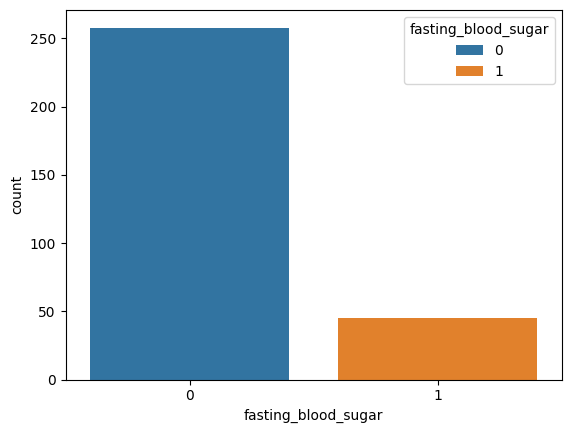

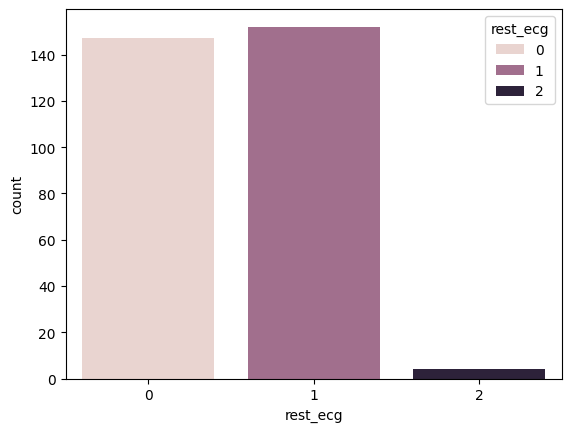

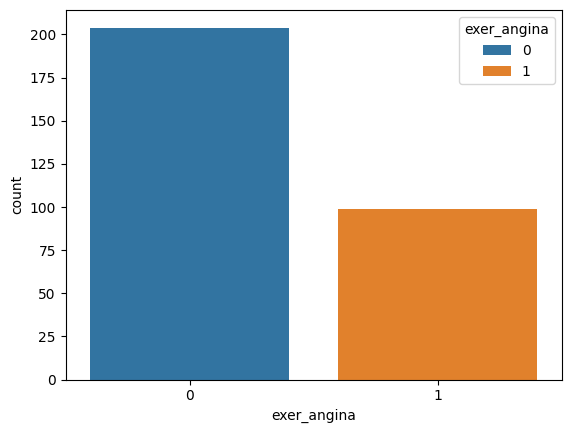

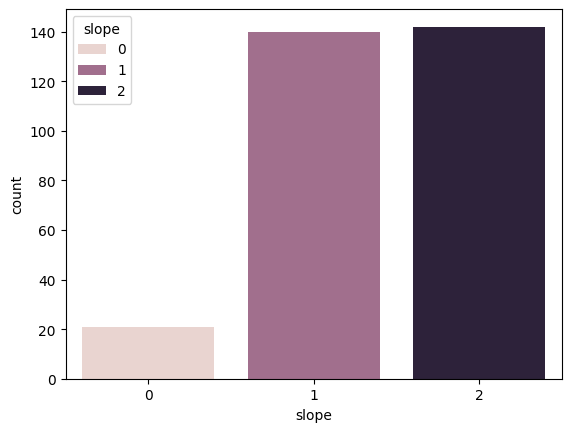

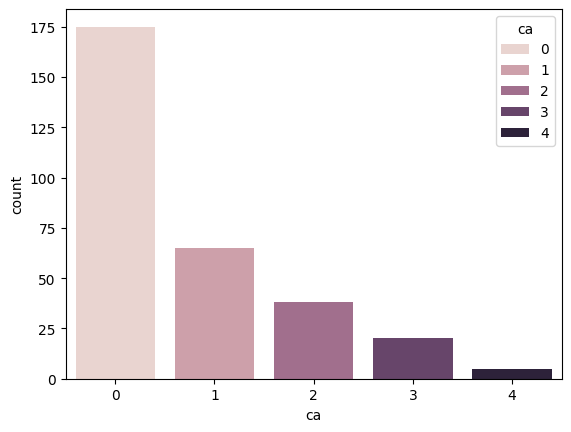

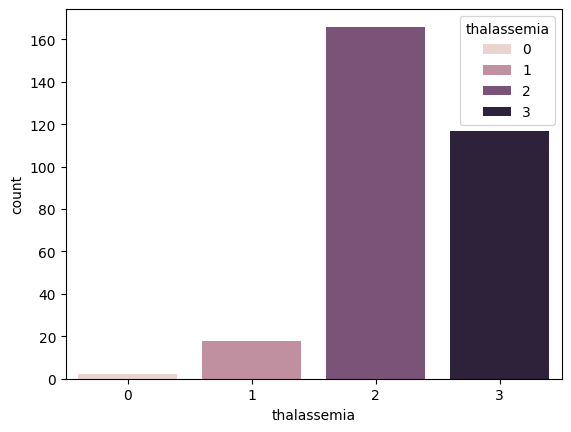

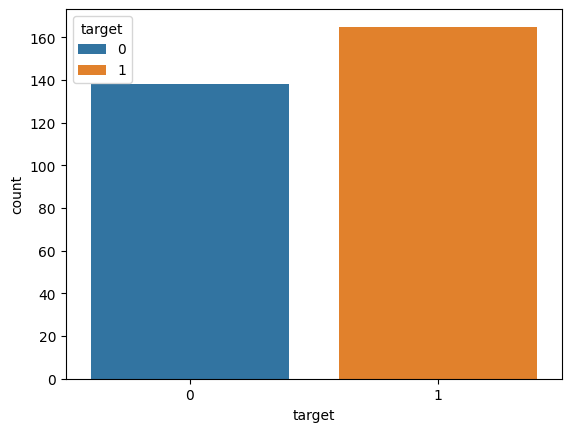

In [120]:
for col in cat_col:
    sns.countplot(data=df,x= df[col], hue=df[col])
    plt.show()

In [121]:
#Scaling Data
df_new=pd.DataFrame(MinMaxScaler().fit_transform(df))
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [122]:
# Spliting data into Feature and Target
X= df_new.iloc[:,:-1] # Features
y=df_new.iloc[:,-1]  # Target
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [123]:
#Spliting the the data for Testing and Training 
xtrain, xtest, ytrain, ytest =train_test_split(X,y, train_size=0.8, random_state=100)
xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12
184,0.437500,1.0,0.000000,0.528302,0.267123,0.0,0.0,0.435115,0.0,0.419355,0.5,0.00,1.000000
19,0.833333,0.0,1.000000,0.433962,0.257991,0.0,0.5,0.610687,0.0,0.290323,1.0,0.50,0.666667
118,0.354167,0.0,0.333333,0.103774,0.178082,0.0,0.5,0.770992,0.0,0.000000,1.0,0.00,0.666667
41,0.395833,1.0,0.333333,0.339623,0.271689,0.0,0.0,0.832061,0.0,0.032258,0.5,0.00,0.666667
59,0.583333,0.0,0.000000,0.320755,0.404110,0.0,0.0,0.671756,0.0,0.000000,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.458333,1.0,0.666667,0.056604,0.219178,0.0,0.5,0.549618,1.0,0.193548,0.5,0.00,0.666667
53,0.312500,0.0,0.666667,0.132075,0.034247,0.0,0.5,0.793893,0.0,0.096774,0.5,0.00,0.666667
79,0.604167,1.0,0.666667,0.103774,0.260274,0.0,0.0,0.633588,1.0,0.096774,0.5,0.00,1.000000
280,0.270833,1.0,0.000000,0.396226,0.431507,0.0,0.5,0.412214,1.0,0.290323,0.5,0.00,0.333333


#### *Modeling the Data*

In [124]:
# Bulding and training the model
dtc= DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [125]:
# testing the model
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.75        33
         1.0       0.70      0.82      0.75        28

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [126]:
dtc.score(xtrain,ytrain)

1.0

In [127]:
dtc.score(xtest,ytest)

0.7540983606557377

##### Pruning the data 

In [128]:
#As the model is overfit. We need to reduced the complexity, removes unwanted feature or reduce depth of Decision tree
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [129]:
# testing the model
ypred=dt1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74        33
         1.0       0.69      0.79      0.73        28

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [130]:
#Depth of model
dt1.get_depth()

10

In [131]:
# let's reduced the depth
dt2=DecisionTreeClassifier(max_depth=3)
dt2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [132]:
ypred=dt2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89        33
         1.0       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [133]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt2,X,y,cv=12).mean()

np.float64(0.8280769230769232)

#### *Model Performance Evalution*

In [134]:
auc_score=roc_auc_score(ytest,ypred)
auc_score

np.float64(0.8885281385281386)


---------------------------- LogisticRegression ----------------------------
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.83        33
         1.0       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61
 
AUC_Score 0.8430735930735931


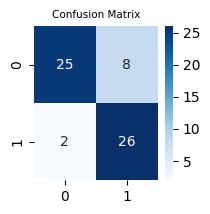


---------------------------- Decision tress Classifier ----------------------------
               precision    recall  f1-score   support

         0.0       0.86      0.73      0.79        33
         1.0       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61
 
AUC_Score 0.7922077922077921


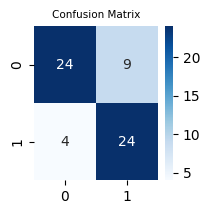


---------------------------- Random Forest Classifer ----------------------------
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.83        33
         1.0       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61
 
AUC_Score 0.8430735930735931


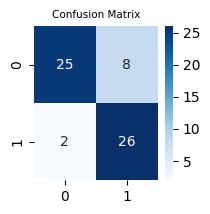


---------------------------- Ada Boost Classifier ----------------------------
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.83        33
         1.0       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61
 
AUC_Score 0.8430735930735931


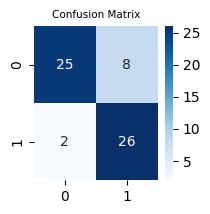


---------------------------- Gradient Boosting Classifier ----------------------------
               precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        33
         1.0       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61
 
AUC_Score 0.8252164502164502


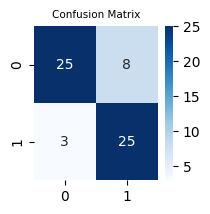


---------------------------- Support vector Classifier ----------------------------
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        33
         1.0       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61
 
AUC_Score 0.8733766233766233


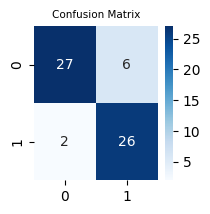


---------------------------- XGB Classifier ----------------------------
               precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        33
         1.0       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61
 
AUC_Score 0.8252164502164502


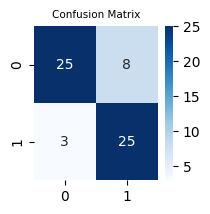

In [135]:
lg=LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
ac= AdaBoostClassifier()
gbc= GradientBoostingClassifier()
scv= SVC()
xgb= XGBClassifier()

classifier={'LogisticRegression':lg,
            'Decision tress Classifier': dt,
            'Random Forest Classifer': rf,
            'Ada Boost Classifier' :ac,
            'Gradient Boosting Classifier':gbc,
            'Support vector Classifier':scv,
            'XGB Classifier' : xgb
           }
scores= []            
for i, j in classifier.items():
    j.fit(xtrain, ytrain)
    ypred=j.predict(xtest)
    auc_score=roc_auc_score(ytest,ypred)
    #scores += (accuracy_score(ypred,ytest)*100)
    cm=confusion_matrix(ytest,ypred)
    print("\n----------------------------",i,"----------------------------""\n",classification_report(ytest, ypred),"\nAUC_Score", auc_score)
    plt.figure(figsize=(2,2))
    sns.heatmap(data=cm, cmap='Blues', annot=True)
    plt.title("Confusion Matrix", size=7.5)
    plt.show()
   

##### *We can see that accuracy is significantly increases from 75% to 89%  as we reduce the depth from 10 to 3 for Decision Tree Classification, and we also try to check for acurracy using differen methods and the maximum accuracy is achieved is 89%.*
##### *AUC score is 0.88 which is closed to 1, so we can say that the model is perfect and performing well than just a random guessing*